# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import os

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [24]:
# Link download mentah
url = 'https://drive.google.com/uc?export=download&id=124jGhnab8pWzXtvf286NWPcl5Zjz5ILP'

# Membaca CSV langsung
df = pd.read_csv(url)

# Tampilkan beberapa baris pertama untuk memeriksa
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

##1.Pemahaman Awal Data dan Struktur

In [25]:
print("Dimensi Data:")
print(f"Jumlah Baris: {df.shape[0]}")
print(f"Jumlah Kolom: {df.shape[1]}")

print("\nInformasi Tipe Data per Kolom:")
df.info()

print("\nLima Baris Pertama Data:")
print(df.head())

print("\nLima Baris Terakhir Data:")
print(df.tail())

print("\nNama-nama Kolom:")
print(df.columns.tolist())

Dimensi Data:
Jumlah Baris: 10000
Jumlah Kolom: 14

Informasi Tipe Data per Kolom:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB

Lima Baris

Berdasarkan data diatas, terdapat asusmi adanya  **kolom-kolom yang tidak relevan** seperti `RowNumber`, `CustomerId`, dan `Surname` karena tidak memiliki nilai prediktif untuk model. Selanjutnya, perlu dilakukan **encoding** pada fitur kategorikal seperti `Geography` dan `Gender` agar bisa dipahami oleh algoritma, sementara kolom biner seperti `HasCrCard` dan `IsActiveMember` sudah siap digunakan. Karena tidak ada *missing values* yang ditemukan, kita bisa langsung melanjutkan dengan **penskalaan data numerik** (`CreditScore`, `Age`, `Balance`, dll.) untuk menyamakan rentang nilainya dan meningkatkan performa model, terutama untuk algoritma yang sensitif terhadap skala data. Langkah-langkah ini akan mempersiapkan data secara optimal untuk tahap pemodelan selanjutnya, dengan kolom target `Exited` yang sudah dalam format biner yang ideal.

##2.Statistik Deskriptif

Statistik Deskriptif untuk Kolom Numerik:
         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584   

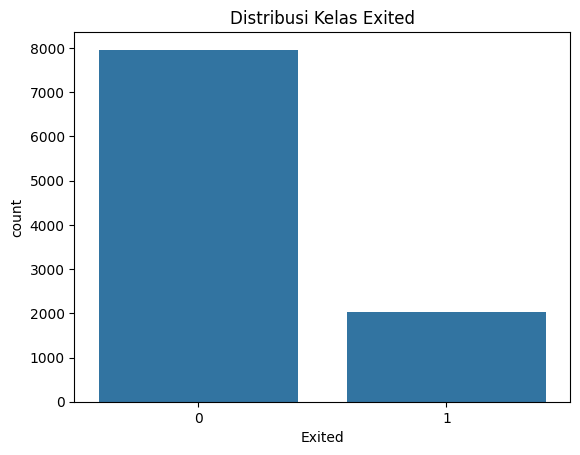

In [26]:
print("Statistik Deskriptif untuk Kolom Numerik:")
print(df.describe())

print("\nStatistik Deskriptif untuk Kolom Kategorikal (count, unique, top, freq):")
for col in df.select_dtypes(include=['object', 'category']).columns:
    print(f"\nKolom: {col}")
    print(df[col].describe())

print("\nDistribusi nilai untuk kolom 'Geography':")
print(df['Geography'].value_counts())

print("\nDistribusi nilai untuk kolom 'Gender':")
print(df['Gender'].value_counts())

print("\nDistribusi nilai untuk kolom 'NumOfProducts':")
print(df['NumOfProducts'].value_counts())

print("\nDistribusi nilai untuk kolom 'HasCrCard':")
print(df['HasCrCard'].value_counts())

print("\nDistribusi nilai untuk kolom 'IsActiveMember':")
print(df['IsActiveMember'].value_counts())

print("\nDistribusi nilai untuk kolom 'Exited' (Variabel Target):")
print(df['Exited'].value_counts())
sns.countplot(x='Exited', data=df)
plt.title('Distribusi Kelas Exited')
plt.show()

Statistik deskriptif ini memberikan wawasan penting untuk persiapan model. Analisis menunjukkan bahwa data tidak memiliki nilai yang hilang, namun terdapat ketidakseimbangan yang signifikan pada variabel target Exited, di mana nasabah yang keluar (churn) hanya sekitar 20% dari total data, sehingga memerlukan teknik khusus untuk menanganinya. Dari sisi fitur, kolom seperti Balance menunjukkan keunikan dengan 25% data bernilai nol, sedangkan CreditScore, Age, dan EstimatedSalary memiliki rentang nilai yang lebar, yang menunjukkan perlunya penskalaan fitur sebelum melatih model. Sementara itu, kolom kategorikal seperti Geography dan Gender harus di-encoding ke dalam bentuk numerik, dan kolom identifikasi seperti Surname harus dihapus karena tidak relevan untuk pemodelan.

##3.Penanganan Missing Values

Jumlah Missing Values per Kolom:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Persentase Missing Values per Kolom:
RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64


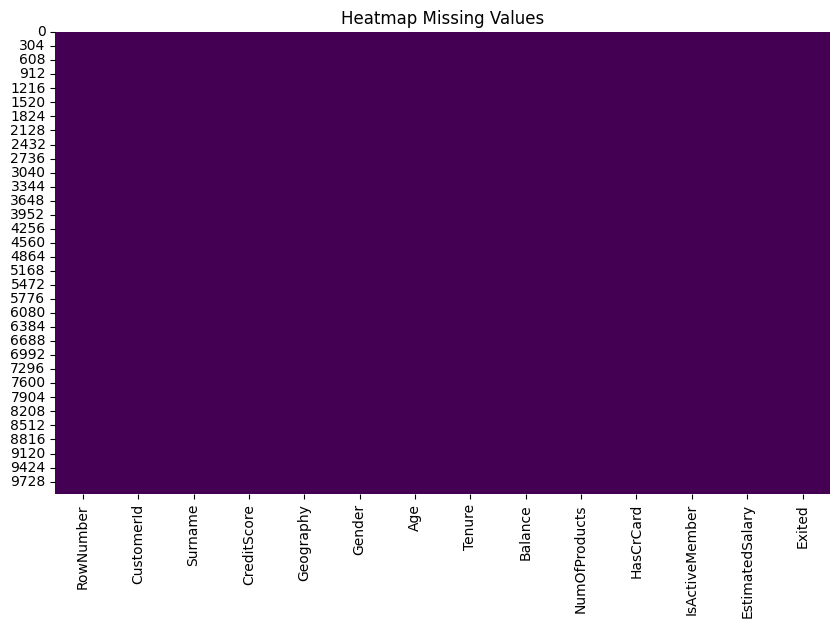

In [27]:
print("Jumlah Missing Values per Kolom:")
print(df.isnull().sum())

print("\nPersentase Missing Values per Kolom:")
print((df.isnull().sum() / len(df)) * 100)

# Visualisasi Missing Values (jika ada)
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap Missing Values')
plt.show()

Setelah memverifikasi ulang lagi ternyata benar betul tidak ada missing value dalam dataset ini

## 4.Analisis Duplikasi Data

In [28]:
# Mengecualikan 'RowNumber' dan 'CustomerId' karena keduanya adalah ID unik
duplicate_columns = df.columns.drop(['RowNumber', 'CustomerId'])
print("Jumlah Baris Duplikat (mengabaikan RowNumber dan CustomerId):")
print(df.duplicated(subset=duplicate_columns).sum())

if df.duplicated(subset=duplicate_columns).sum() > 0:
    print("\nBaris Duplikat (mengabaikan RowNumber dan CustomerId):")
    print(df[df.duplicated(subset=duplicate_columns, keep=False)]) # Menampilkan semua duplikat
    # df.drop_duplicates(subset=duplicate_columns, inplace=True) # Menghapus duplikat
    # print(f"\nJumlah Baris Setelah Penghapusan Duplikat: {df.shape[0]}")
else:
    print("Tidak ada duplikasi data yang signifikan (mengabaikan ID unik).")

Jumlah Baris Duplikat (mengabaikan RowNumber dan CustomerId):
0
Tidak ada duplikasi data yang signifikan (mengabaikan ID unik).


tidak ada data duplikasi juga yang terdeteksi dalam data ini

##5.Analisis Outlier

Analisis Outlier untuk Kolom Numerik:


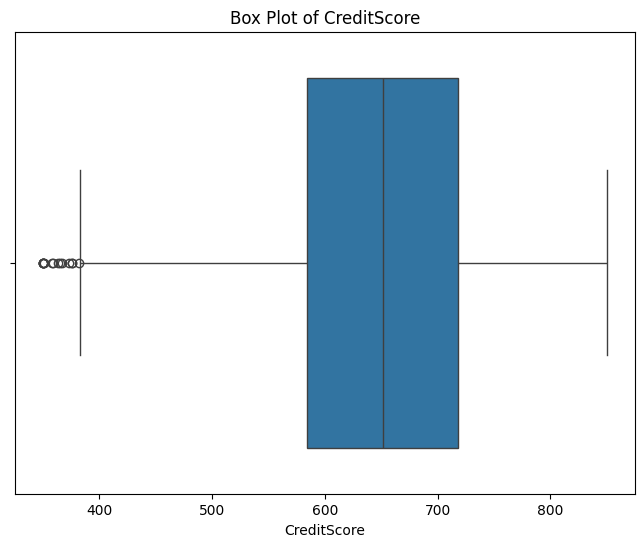


Outlier di kolom 'CreditScore':
      CreditScore
7             376
942           376
1193          363
1405          359
1631          350
1838          350
1962          358
2473          351
2579          365
8154          367
8723          350
8762          350
9210          382
9356          373
9624          350


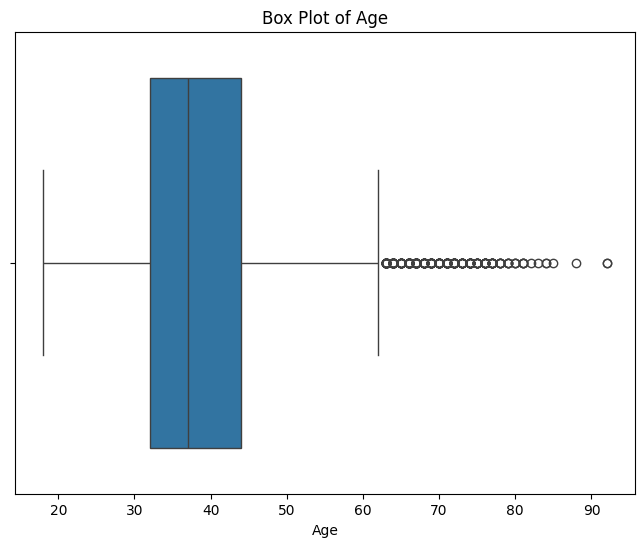


Outlier di kolom 'Age':
      Age
58     66
85     75
104    65
158    73
181    65
...   ...
9753   68
9765   64
9832   64
9894   77
9936   77

[359 rows x 1 columns]


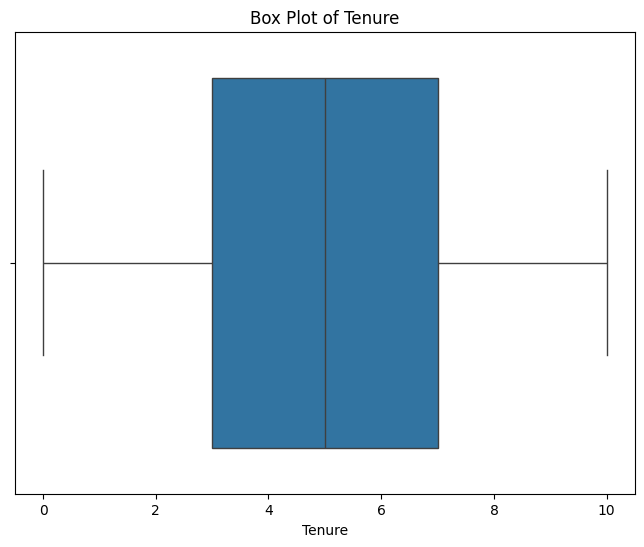


Tidak ada outlier yang terdeteksi di kolom 'Tenure' menggunakan metode IQR.


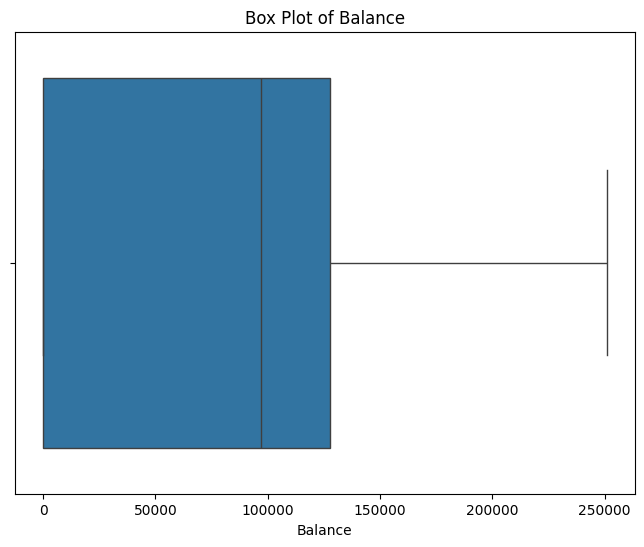


Tidak ada outlier yang terdeteksi di kolom 'Balance' menggunakan metode IQR.


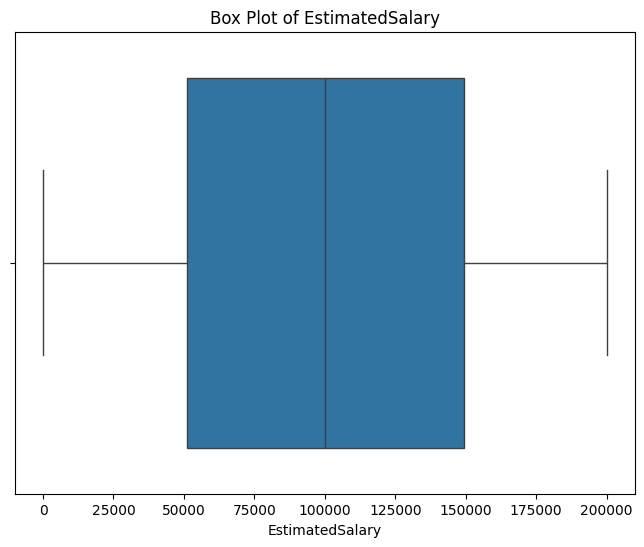


Tidak ada outlier yang terdeteksi di kolom 'EstimatedSalary' menggunakan metode IQR.


In [29]:
print("Analisis Outlier untuk Kolom Numerik:")

# Kolom yang relevan untuk outlier (tidak termasuk ID dan biner)
outlier_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

for col in outlier_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

    # Contoh identifikasi outlier menggunakan IQR (hanya contoh, tidak akan mengubah data)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    if not outliers.empty:
        print(f"\nOutlier di kolom '{col}':")
        print(outliers[[col]])
    else:
        print(f"\nTidak ada outlier yang terdeteksi di kolom '{col}' menggunakan metode IQR.")

Dari EDA diatas saya mengansumsikan bahwa outlier terjadi bukan karna adanya kesalahan input, melainkan benar dari data asli. Oleh karena itu saya ingin mempertahankannya dengan teknik winsorizing

##6.Analisis Korelasi

Matriks Korelasi Antar Kolom Numerik:
                 RowNumber  CustomerId  CreditScore       Age    Tenure  \
RowNumber         1.000000    0.004202     0.005840  0.000783 -0.006495   
CustomerId        0.004202    1.000000     0.005308  0.009497 -0.014883   
CreditScore       0.005840    0.005308     1.000000 -0.003965  0.000842   
Age               0.000783    0.009497    -0.003965  1.000000 -0.009997   
Tenure           -0.006495   -0.014883     0.000842 -0.009997  1.000000   
Balance          -0.009067   -0.012419     0.006268  0.028308 -0.012254   
NumOfProducts     0.007246    0.016972     0.012238 -0.030680  0.013444   
HasCrCard         0.000599   -0.014025    -0.005458 -0.011721  0.022583   
IsActiveMember    0.012044    0.001665     0.025651  0.085472 -0.028362   
EstimatedSalary  -0.005988    0.015271    -0.001384 -0.007201  0.007784   
Exited           -0.016571   -0.006248    -0.027094  0.285323 -0.014001   

                  Balance  NumOfProducts  HasCrCard  IsActive

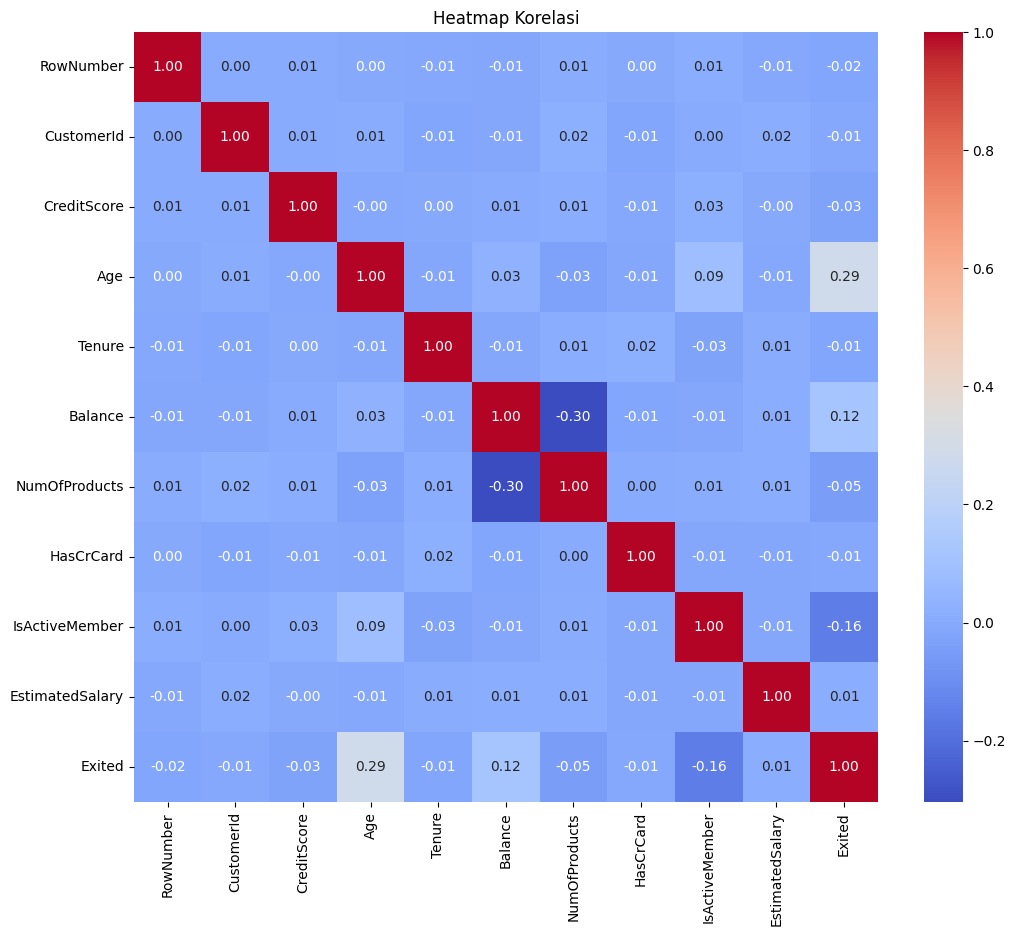

In [30]:
print("Matriks Korelasi Antar Kolom Numerik:")
correlation_matrix = df.select_dtypes(include=np.number).corr()
print(correlation_matrix)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi')
plt.show()

tidak ada tanda tandanya multikolinearitas jadi kita biarkan saja

##7.Analisis Kardinalitas Kolom Kategorikal

In [31]:
print("Kardinalitas Kolom Kategorikal:")

for col in df.select_dtypes(include=['object', 'category']).columns:
    unique_count = df[col].nunique()
    print(f"Kolom '{col}': {unique_count} nilai unik")

# Kolom 'Surname' memiliki kardinalitas tinggi karena ini adalah nama unik.
# Kolom ini biasanya dihapus dalam analisis churn.

Kardinalitas Kolom Kategorikal:
Kolom 'Surname': 2932 nilai unik
Kolom 'Geography': 3 nilai unik
Kolom 'Gender': 2 nilai unik


surname akan kita hapus karena ada indikasi terjadinya kardinalitas

##8.Kesimpulan

Dari hasil EDA yang Anda sampaikan, dapat disimpulkan bahwa data Anda berada dalam kondisi yang cukup baik untuk tahap pemodelan. Beberapa poin penting yang ditemukan antara lain:
* **Tidak ada *Missing Values***: Hal ini sangat baik karena Anda tidak perlu melakukan imputasi atau penghapusan data.
* **Tidak ada Data Duplikat**: Ini juga menunjukkan kualitas data yang bersih dari entri ganda.
* **Ketidakseimbangan Kelas (Class Imbalance)**: Variabel target **`Exited`** menunjukkan ketidakseimbangan yang signifikan (churn hanya 20%). Ini adalah masalah krusial yang memerlukan penanganan khusus (misalnya, oversampling atau undersampling) agar model tidak bias terhadap kelas mayoritas.
* **Adanya *Outliers***: Anda telah mengidentifikasi adanya *outliers* dan beranggapan bahwa itu adalah data asli, sehingga Anda memutuskan untuk menanganinya dengan teknik **winsorizing** untuk menjaga informasi yang terkandung dalam data tersebut.
* **Kardinalitas Tinggi**: Kolom **`Surname`** memiliki kardinalitas yang tinggi, yang menjadikannya tidak relevan dan berpotensi mengganggu performa model.
* **Tidak Ada Multikolinearitas**: Ini adalah kabar baik, karena Anda tidak perlu melakukan penghapusan fitur berdasarkan hubungan linier yang kuat antar variabel.

---

**Langkah Preprocessing yang Harus Dilakukan**

1.  **Penghapusan Fitur yang Tidak Relevan**: Hapus kolom **`RowNumber`**, **`CustomerId`**, dan **`Surname`**. Ketiga kolom ini tidak memiliki nilai prediktif untuk model.
2.  **Encoding Fitur Kategorikal**: Lakukan *encoding* pada kolom **`Geography`** dan **`Gender`** agar dapat dipahami oleh algoritma *machine learning*. Pilihan yang umum adalah **One-Hot Encoding** untuk `Geography` dan **Label Encoding** untuk `Gender` (karena hanya memiliki dua kategori).
3.  **Penskalaan Data Numerik**: Lakukan penskalaan pada kolom numerik seperti **`CreditScore`**, **`Age`**, **`Balance`**, dan **`EstimatedSalary`**. Penskalaan ini penting untuk menyamakan rentang nilai dan meningkatkan performa model, terutama pada algoritma yang sensitif terhadap skala seperti SVM atau regresi. Teknik yang bisa digunakan adalah **StandardScaler**.
4.  **Penanganan *Outliers***: Terapkan teknik **winsorizing** pada fitur-fitur yang teridentifikasi memiliki *outliers* untuk membatasi nilai-nilai ekstrem tersebut tanpa menghapusnya.
5.  **Penanganan Ketidakseimbangan Kelas**: Terapkan teknik seperti **SMOTE (Synthetic Minority Over-sampling Technique)** atau *undersampling* pada variabel target **`Exited`** untuk menyeimbangkan jumlah data antara kelas mayoritas dan minoritas. Langkah ini sangat penting untuk memastikan model dapat memprediksi kelas minoritas (nasabah yang keluar) dengan akurat.

---

**Langkah Preprocessing yang Tidak Perlu Dilakukan**

1.  **Penanganan *Missing Values***: Karena Anda telah memverifikasi bahwa tidak ada nilai yang hilang dalam dataset.
2.  **Penghapusan Data Duplikat**: Karena tidak ada data duplikat yang terdeteksi.
3.  **Penghapusan Fitur karena Multikolinearitas**: Karena Anda telah mengonfirmasi bahwa tidak ada tanda-tanda multikolinearitas.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

##1.Menghapus atau Menangani Data Kosong (Missing Values)

Dari EDA yang telah dilakukan tidak adanya missing value yang terdeteksi sehingga kita tidak perlu melakukan tahapan ini

##2.Menghapus Data Duplikat

Dari EDA yang telah dilakukan tidak adanya Data Duplikat yang terdeteksi sehingga kita tidak perlu melakukan tahapan ini

##3.Encode

In [32]:
df_encoded = pd.get_dummies(df.copy(), columns=['Gender', 'Geography'], drop_first=True)

# Menampilkan 5 baris pertama dari DataFrame yang sudah di-encoded
print("DataFrame setelah One-Hot Encoding:")
print(df_encoded.head())

# Menampilkan kolom-kolom baru yang terbentuk
print("\nKolom-kolom baru setelah encoding:")
print([col for col in df_encoded.columns if 'Gender_' in col or 'Geography_' in col])

DataFrame setelah One-Hot Encoding:
   RowNumber  CustomerId   Surname  CreditScore  Age  Tenure    Balance  \
0          1    15634602  Hargrave          619   42       2       0.00   
1          2    15647311      Hill          608   41       1   83807.86   
2          3    15619304      Onio          502   42       8  159660.80   
3          4    15701354      Boni          699   39       1       0.00   
4          5    15737888  Mitchell          850   43       2  125510.82   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  \
0              1          1               1        101348.88       1   
1              1          0               1        112542.58       0   
2              3          1               0        113931.57       1   
3              2          0               0         93826.63       0   
4              1          1               1         79084.10       0   

   Gender_Male  Geography_Germany  Geography_Spain  
0        False             

##4.Konversi Tipe Data

In [33]:
import pandas as pd

# Assuming your data is in a DataFrame called 'df'
# Replace 'df' with the actual name of your DataFrame

# List of columns to convert
columns_to_convert = ['Gender_Male', 'Geography_Germany', 'Geography_Spain']

for col in columns_to_convert:
    df_encoded[col] = df_encoded[col].astype(int)

print(df_encoded[columns_to_convert].head()) # To see the converted columns

   Gender_Male  Geography_Germany  Geography_Spain
0            0                  0                0
1            0                  0                1
2            0                  0                0
3            0                  0                0
4            0                  0                1


In [34]:
df_encoded

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,9997,15569892,Johnstone,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,9998,15584532,Liu,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,9999,15682355,Sabbatini,772,42,3,75075.31,2,1,0,92888.52,1,1,1,0


##4.Outlier

In [35]:
# Definisikan kolom yang akan di-winsorize
columns_to_winsorize = ['CreditScore', 'Age']

# Persentil untuk winsorizing (misalnya, 5% di ujung bawah dan 5% di ujung atas)
# llimits: persentil bawah, rlimits: persentil atas
# (0.05, 0.05) berarti 5% nilai terendah akan diganti dengan nilai di persentil ke-5,
# dan 5% nilai tertinggi akan diganti dengan nilai di persentil ke-95.
lower_limit_percentile = 0.05
upper_limit_percentile = 0.05

print("--- Sebelum Winsorizing ---")
print(df_encoded[columns_to_winsorize].describe())

for col in columns_to_winsorize:
    # Terapkan winsorize
    # `axis=0` berarti winsorize kolom secara individual
    df_encoded[col] = winsorize(df_encoded[col],
                                limits=[lower_limit_percentile, upper_limit_percentile],
                                axis=0)

print("\n--- Setelah Winsorizing ---")
print(df_encoded[columns_to_winsorize].describe())

# Menampilkan beberapa baris pertama untuk melihat perubahan
print("\nDataFrame setelah Winsorizing (beberapa baris pertama):")
print(df_encoded.head())

# Anda juga bisa memeriksa nilai min dan max untuk memastikan winsorizing bekerja
print(f"\nMin CreditScore setelah winsorizing: {df_encoded['CreditScore'].min()}")
print(f"Max CreditScore setelah winsorizing: {df_encoded['CreditScore'].max()}")
print(f"Min Age setelah winsorizing: {df_encoded['Age'].min()}")
print(f"Max Age setelah winsorizing: {df_encoded['Age'].max()}")

--- Sebelum Winsorizing ---
        CreditScore           Age
count  10000.000000  10000.000000
mean     650.528800     38.921800
std       96.653299     10.487806
min      350.000000     18.000000
25%      584.000000     32.000000
50%      652.000000     37.000000
75%      718.000000     44.000000
max      850.000000     92.000000

--- Setelah Winsorizing ---
        CreditScore           Age
count  10000.000000  10000.000000
mean     650.890200     38.704300
std       90.557699      9.327066
min      489.000000     25.000000
25%      584.000000     32.000000
50%      652.000000     37.000000
75%      718.000000     44.000000
max      812.000000     60.000000

DataFrame setelah Winsorizing (beberapa baris pertama):
   RowNumber  CustomerId   Surname  CreditScore  Age  Tenure    Balance  \
0          1    15634602  Hargrave          619   42       2       0.00   
1          2    15647311      Hill          608   41       1   83807.86   
2          3    15619304      Onio          502  

Analisis Outlier untuk Kolom Numerik:


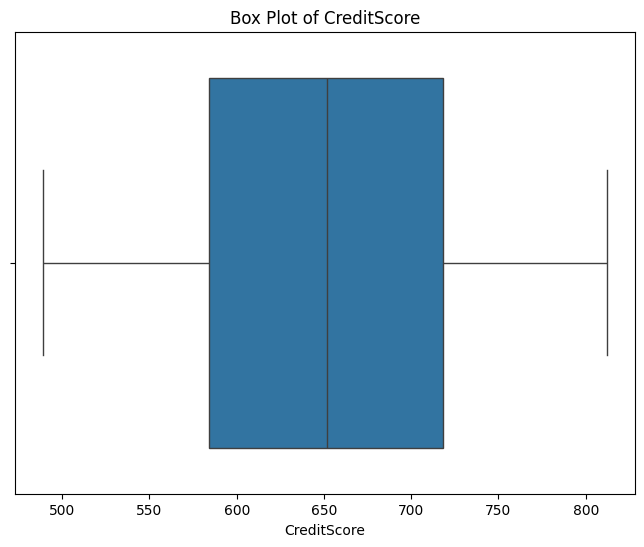


Tidak ada outlier yang terdeteksi di kolom 'CreditScore' menggunakan metode IQR.


/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


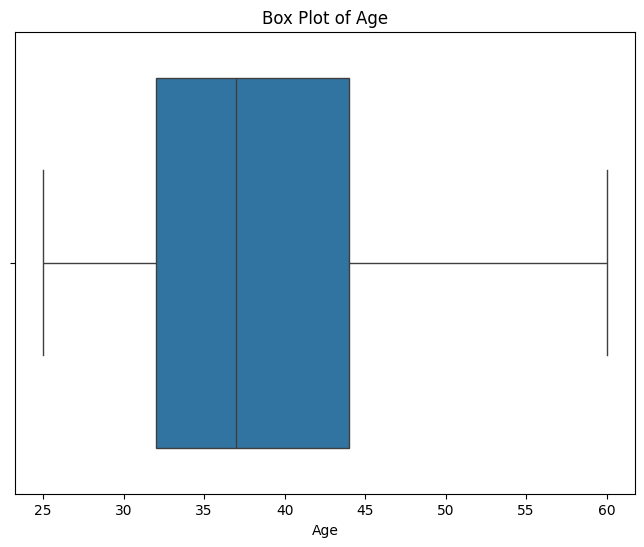


Tidak ada outlier yang terdeteksi di kolom 'Age' menggunakan metode IQR.


/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


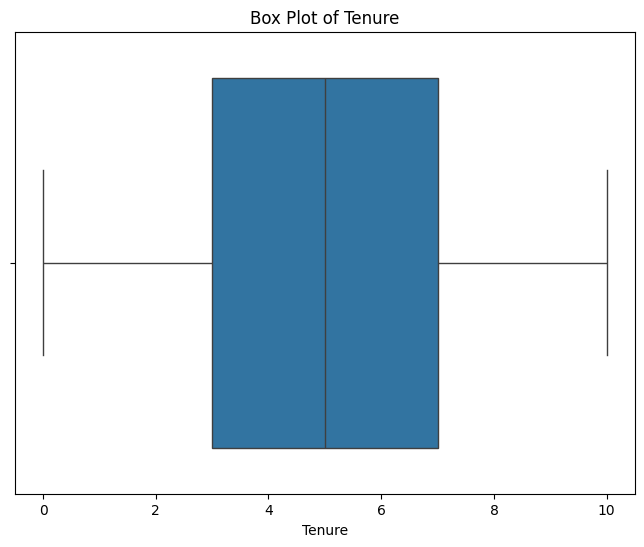


Tidak ada outlier yang terdeteksi di kolom 'Tenure' menggunakan metode IQR.


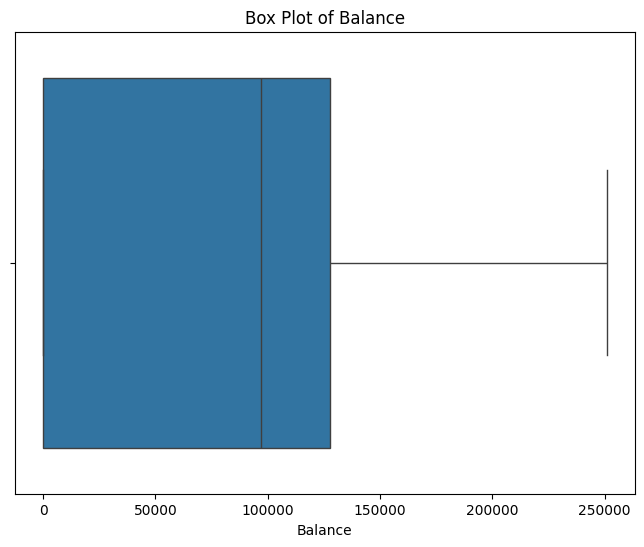


Tidak ada outlier yang terdeteksi di kolom 'Balance' menggunakan metode IQR.


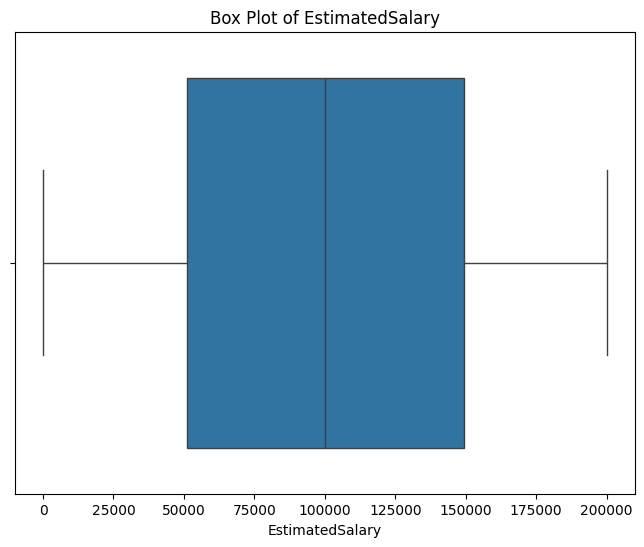


Tidak ada outlier yang terdeteksi di kolom 'EstimatedSalary' menggunakan metode IQR.


In [36]:
# Cell 5: Analisis Outlier
print("Analisis Outlier untuk Kolom Numerik:")

# Kolom yang relevan untuk outlier (tidak termasuk ID dan biner)
outlier_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

for col in outlier_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df_encoded[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

    # Contoh identifikasi outlier menggunakan IQR (hanya contoh, tidak akan mengubah data)
    Q1 = df_encoded[col].quantile(0.25)
    Q3 = df_encoded[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_encoded[(df_encoded[col] < lower_bound) | (df_encoded[col] > upper_bound)]
    if not outliers.empty:
        print(f"\nOutlier di kolom '{col}':")
        print(outliers[[col]])
    else:
        print(f"\nTidak ada outlier yang terdeteksi di kolom '{col}' menggunakan metode IQR.")

##5.Menghilangkan Kolom Yang Tidak Relevan

In [37]:
df_cleaned = df_encoded.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

##6.Train Test Split

In [38]:
# Pisahkan fitur (X) dan target (y)
X = df_cleaned.drop('Exited', axis=1)
y = df_cleaned['Exited']

# Lakukan Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Cetak bentuk (shape) dari setiap dataset untuk verifikasi
print("Bentuk X_train:", X_train.shape)
print("Bentuk X_test:", X_test.shape)
print("Bentuk y_train:", y_train.shape)
print("Bentuk y_test:", y_test.shape)

Bentuk X_train: (8000, 11)
Bentuk X_test: (2000, 11)
Bentuk y_train: (8000,)
Bentuk y_test: (2000,)


kita lakukan train test split disini agar tidak terjadi data leakage

##7.Normalisasi/Standarisasi

In [39]:
from sklearn.preprocessing import StandardScaler

# Misalkan X_train dan X_test adalah output dari tahap train-test split sebelumnya.

# Tentukan fitur-fitur numerik yang akan di-scale
# Ini adalah daftar yang sama dengan yang ada di kode awal Anda
features_to_scale = [
    'CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Tenure'
]

# Tambahkan fitur 'IsActiveMember' jika ada dan ingin di-scale
# asumsikan 'IsActiveMember' sudah biner (0/1) dan tidak perlu di-scale

# Inisialisasi scaler
scaler = StandardScaler()

# Terapkan StandardScaler pada data latih (fit_transform)
# Gunakan iloc untuk memilih kolom agar tidak terjadi masalah 'SettingWithCopyWarning'
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])

# Terapkan scaler yang sama pada data uji (transform)
X_test_scaled[features_to_scale] = scaler.transform(X_test[features_to_scale])

print("Data Latih (X_train) setelah scaling:")
print(X_train_scaled[features_to_scale].head())
print("\nData Uji (X_test) setelah scaling:")
print(X_test_scaled[features_to_scale].head())

Data Latih (X_train) setelah scaling:
      CreditScore       Age   Balance  NumOfProducts  EstimatedSalary  \
9254     0.376926 -0.714221 -1.218471       0.808436         1.367670   
1561    -0.221252  0.354672  0.696838       0.808436         1.661254   
1670    -1.029900 -1.462446  0.618629      -0.916688        -0.252807   
6087    -1.007746 -1.248667  0.953212      -0.916688         0.915393   
6669    -1.495150  1.851122  1.057449      -0.916688        -1.059600   

        Tenure  
9254  0.345680  
1561 -0.348369  
1670 -0.695393  
6087  1.386753  
6669  1.386753  

Data Uji (X_test) setelah scaling:
      CreditScore       Age   Balance  NumOfProducts  EstimatedSalary  \
6252    -0.620038 -0.714221  0.329937       0.808436        -1.019605   
4684    -0.320949  0.461561 -1.218471       0.808436         0.798883   
1731    -0.564651  0.568451 -1.218471       0.808436        -0.727980   
4742    -1.617001  2.171790  0.689272       0.808436         1.221387   
4521    -1.018823 -1

##8.Imbalanced Class

In [40]:
# Inisialisasi SMOTE dengan random_state untuk hasil yang konsisten
smote = SMOTE(random_state=42)

# Terapkan SMOTE pada data latih
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# --- Verifikasi hasil SMOTE ---
print("\n--- SMOTE Selesai ---")

# Cetak jumlah sampel sebelum SMOTE
print("Jumlah sampel di y_train sebelum SMOTE:")
print(y_train.value_counts())

print("\nJumlah sampel di y_train_smote setelah SMOTE:")
print(y_train_smote.value_counts())

print("\nBentuk X_train_smote:", X_train_smote.shape)
print("Bentuk y_train_smote:", y_train_smote.shape)


--- SMOTE Selesai ---
Jumlah sampel di y_train sebelum SMOTE:
Exited
0    6356
1    1644
Name: count, dtype: int64

Jumlah sampel di y_train_smote setelah SMOTE:
Exited
0    6356
1    6356
Name: count, dtype: int64

Bentuk X_train_smote: (12712, 11)
Bentuk y_train_smote: (12712,)


##9.Penggabungan

In [42]:
# Get the current working directory
current_directory = os.getcwd()

# Gabungkan X_train_smote dan y_train_smote
df_train_final = pd.concat([X_train_smote, y_train_smote], axis=1)
df_train_final.to_csv(os.path.join(current_directory, 'churn_train_preprocessed.csv'), index=False)
print("File 'churn_train_preprocessed.csv' berhasil disimpan.")

# Gabungkan X_test dan y_test
df_test_final = pd.concat([X_test_scaled, y_test], axis=1)
df_test_final.to_csv(os.path.join(current_directory, 'churn_test_preprocessed.csv'), index=False)
print("File 'churn_test_preprocessed.csv' berhasil disimpan.")

File 'churn_train_preprocessed.csv' berhasil disimpan.
File 'churn_test_preprocessed.csv' berhasil disimpan.
